<a href="https://colab.research.google.com/github/TriDuks/Final_AI/blob/main/class_name.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASETS**

In [ ]:
Datasets: https://drive.google.com/drive/folders/1Q6bL80OTBk8W51HBF7H1cMoED-8G1WK8?usp=share_link

SyntaxError: ignored

In [ ]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array

# **Processing**

In [ ]:
#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh, chia dữ liệu và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.05,
                                   rotation_range = 20,         #Tăng cường dữ liệu 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,                                 
                                  )
#train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/1_FINAL/Training', 
                                                 target_size = (128,128), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 796 images belonging to 7 classes.


In [ ]:
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.05,
                                  rotation_range = 20,         #Tăng cường dữ liệu 
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/1_FINAL/Test', 
                                                
                                                 target_size = (128,128), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')

Found 63 images belonging to 7 classes.


In [ ]:
training_set.class_indices

{'Bicycle': 0,
 'Bus': 1,
 'Car': 2,
 'DriverBicycle': 3,
 'DriverMotorbike': 4,
 'Motor': 5,
 'Truck': 6}

In [ ]:
test_set.class_indices

{'Bicycle': 0,
 'Bus': 1,
 'Car': 2,
 'DriverBicycle': 3,
 'DriverMotorbike': 4,
 'Motor': 5,
 'Truck': 6}

In [ ]:
len(training_set)

26

In [ ]:
len(test_set)

3

# **TẠO MODEL BẰNG CNN**

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam


In [ ]:

# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(Conv2D(32,(3,3), activation='linear', input_shape=[128,128,3],padding='same')) 
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(Dropout(0.1))

#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(Dropout(0.1))

model.add(Conv2D(128,(3,3), activation = 'linear',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
model.add(Dropout(0.2))

#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))

#Output
model.add(Dense(7, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0

In [ ]:
# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])


In [ ]:
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)

Epoch 1/80
25/25 [==============================] - 331s 13s/step - loss: 3.7493 - accuracy: 0.2412 - val_loss: 1.8727 - val_accuracy: 0.2857
Epoch 2/80
25/25 [==============================] - 55s 2s/step - loss: 1.5337 - accuracy: 0.4397 - val_loss: 2.0704 - val_accuracy: 0.3333
Epoch 3/80
25/25 [==============================] - 51s 2s/step - loss: 1.2914 - accuracy: 0.5440 - val_loss: 1.7664 - val_accuracy: 0.3968
Epoch 4/80
25/25 [==============================] - 52s 2s/step - loss: 1.1144 - accuracy: 0.5905 - val_loss: 1.4523 - val_accuracy: 0.5556
Epoch 5/80
25/25 [==============================] - 51s 2s/step - loss: 0.9837 - accuracy: 0.6307 - val_loss: 1.4044 - val_accuracy: 0.5556
Epoch 6/80
25/25 [==============================] - 52s 2s/step - loss: 0.9546 - accuracy: 0.6570 - val_loss: 1.7475 - val_accuracy: 0.5238
Epoch 7/80
25/25 [==============================] - 50s 2s/step - loss: 0.8481 - accuracy: 0.6834 - val_loss: 1.4829 - val_accuracy: 0.5714
Epoch 8/80
25/25 [

In [ ]:
# Model evaluation
test_loss, test_acc = model.evaluate(test_set, verbose=False)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc) 

Test loss: 2.422696352005005
Test accuracy: 0.6507936716079712


In [ ]:
y_pred = model.predict_generator(test_set)
y_pred_class = y_pred > 0.4
y_pred_class

<ipython-input-9-e38c81e243d6>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_set)


array([[False, False,  True, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False, False,  True, False, False],
       [False,  True, False, False, False, False, False],
       [False, False, False, False, False,  True, False],
       [False, False,  True, False, False, False, False],
       [False,  True, False, False, False, False, False],
       [ True, False, False, False, False, False, False],
       [False, False,  True, False, False, False, False],
       [False, False, False, False, False, False,  True],
       [False, False,  True, False, False, False, False],
       [False, False, False, False, False, False,  True],
       [ True, False, False, False, False, False, False],
       [False,  True, False, False, False, False, False],
       [False, False, False, False, False,  True, False],
       [False, False, False, False, False, False,  True],
       [False,

In [ ]:
training_set.class_indices

{'Bicycle': 0, 'Bus': 1, 'Car': 2, 'Motor': 3}

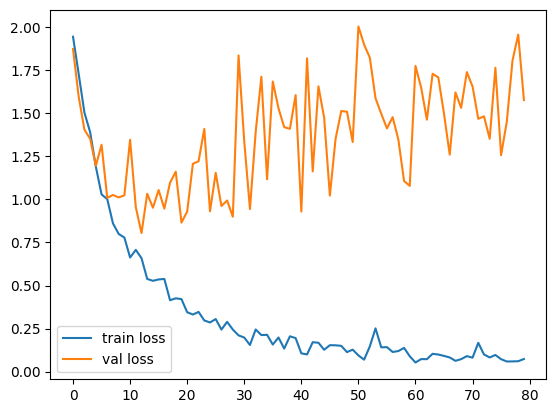

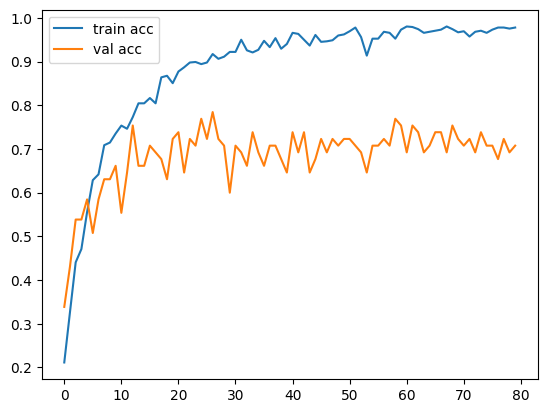

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Lưu a h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/AI/1_FINAL/model_inception.h5')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/AI/1_FINAL/model_inception.h5')
model

# **CHẠY THỬ NGHIỆM**

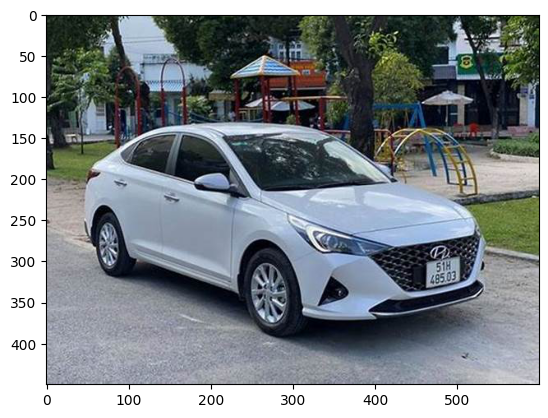

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/AI/1_FINAL/Valid/Test1.jpg') #bạn Phi
img_data = img_to_array(img_data)
plt.imshow(img_data/255)


In [ ]:
import numpy as np
from keras.preprocessing import image
while 1 :
 ch = input('Chọn' ' image : ')
 if (ch=='-'):
     break
 else:
   try: 
     test_image = load_img("/content/drive/MyDrive/AI/1_FINAL/Valid/{}.jpg".format(ch),
                             target_size=(128,128)) #Scale
     test_image = img_to_array(test_image)
     plt.imshow(test_image/255)
     test_image = np.expand_dims(test_image,axis=0)
     r = (model.predict(test_image) > 0.5).astype("int32")
     print(r)
     x=0
     c=0
     i=0
     while (i<6):
       if r[0][i]>=x:
         x=r[0][i]
         c=i
        
       i=i+1
       #Bicycle': 0, 'Bus': 1, 'Car': 2, 'Motor': 3
     if (x<=0 and c>=6) :
         c=6
     if c == 0:
       prediction = 'Bicycle'
     elif c == 1:
       prediction = 'Bus'
     elif c == 2:
       prediction = 'Car'
     elif c == 3:
       prediction = 'Motor'
     elif c == 4:
       prediction = 'Bicycle'
     elif c == 5:
       prediction = 'Motor'
     elif c == 6:
       prediction = 'Truck'

           
     print(prediction)
   except:
      print('Tên của hình ảnh không tồn tại '  )


# **CODE IN PYTHON**

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy as np
from keras.models import load_model
from keras.utils import img_to_array
model = load_model('model_inception (6).h5')

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Vehicle Classification')
top.configure(background='#FFFFFF')
label=Label(top,background='#FFFFFF', font=('arial',15,'bold'))
sign_image = Label(top)
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((128,128))
    image = img_to_array(image)
    Test_image = np.expand_dims(image, axis=0)
    #pred = np.argmax(model.predict(image), axis=-1)
    result = (model.predict(Test_image) > 0.5).astype("int32")
    #result = np.argmax(model.predict(Test_image), axis=-1)
    print(result)
    x=0
    c=0
    i=0
    while (i<6):
        if result[0][i]>= x:
            x=result[0][i]
            c=i
        i=i+1
    if (x<=0 and c>=5) :
        c = 6
       #Bicycle': 0, 'Bus': 1, 'Car': 2, 'Motor': 3
    if c == 0:
        prediction = 'Bicycle'
    elif c == 1:
        prediction = 'Bus'
    elif c == 2:
        prediction = 'Car'
    elif c == 3:
        prediction = 'Bicycle'
    elif c == 4:
        prediction = 'Motorbike'
    elif c == 5:
        prediction = 'Motorbike'
    elif c == 6:
        prediction = 'Truck'
    label.configure(foreground='#B20000', text=prediction, font=('arial',24,'bold'))
def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",
   command=lambda: classify(file_path),
   padx=12,pady=5)
    classify_b.configure(background='#364156', foreground='white',
font=('arial',13,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),
    (top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
upload=Button(top,text="Upload an image",command=upload_image,padx=12,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',13,'bold'))
upload.pack(side=BOTTOM,pady=40)
sign_image.pack(side=BOTTOM,expand=True)
print(sign_image)

label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="Vehicle Classification",pady=20, font=('arial',20,'bold'))
heading.configure(background='#FFFFFF',foreground='#B20000')
heading.pack()
top.mainloop()

OSError: ignored